# Downscaled `tasmin` days below -70°C

This notebook is for exploring downscaled data for values below -70°C. It was designed to work for the zarr outputs from the 4km ERA5-based CMIP6 downscaling effort. 


Initial testing of the downscaled `tasmin` data revealed that data for the following models had values below -70°C:

* EC-Earth3-Veg
* HadGEM3-GC31-LL
* KACE-1-0-G
* NorESM2-MM
* TaiESM1
* MRI-ESM2-0
* MPI-ESM1-2-HR
* MIROC6

In this case, there are quite a few values found in the downscaled historical data.

This notebook simply presents downscaled `tasmin` data with days under -70°C counted and plotted in blue.

In [ ]:
import os
import numpy as np
import xarray as xr
from pathlib import Path
from xclim.core.units import convert_units_to
import matplotlib.pyplot as plt
import gc

zarr_dir = Path(
    os.getenv("ZARR_DIR", "/center1/CMIP6/kmredilla/cmip6_4km_downscaling/adjusted")
)

In [ ]:
def plot_cold_tasmin(model, scenario):
    zarr_store = zarr_dir.joinpath(f"tasmin_{model}_{scenario}_adjusted.zarr")

    ds = xr.open_zarr(zarr_store)
    tasmin = convert_units_to(ds.tasmin, "degC")

    # Compute the mean tasmax over time
    tasmin_mean = tasmin.mean("time")

    tamsin_cold = tasmin < -70
    tamsin_cold_count = tamsin_cold.sum("time")

    # Prepare values for histogram
    tamsin_cold_values = tasmin.where(tamsin_cold).values.flatten()
    tamsin_cold_values = tamsin_cold_values[~np.isnan(tamsin_cold_values)]

    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f"Cold tasmin analysis for {model}, {scenario}", fontsize=14)

    # Plot the mean tasmin as a muted background
    axs[0].imshow(
        tasmin_mean.transpose("y", "x").values,
        cmap="Greys",
        alpha=0.5,
        interpolation="none",
    )

    # Overlay the cold day counts using a blue color palette, masking zeros for clarity
    masked_cold = np.ma.masked_where(tamsin_cold_count.T == 0, tamsin_cold_count.T)
    im = axs[0].imshow(masked_cold, cmap="Blues", alpha=0.8, interpolation="none")

    plt.colorbar(im, ax=axs[0], label="Count of Days < -70°C (Blue Overlay)")
    axs[0].set_title("Mean tasmin (grey) with Cold Day Counts (< -70°C) Overlay")
    axs[0].set_xlabel("x")
    axs[0].set_ylabel("y")

    # Histogram subplot
    if tamsin_cold_values.size > 0:
        axs[1].hist(tamsin_cold_values, bins=30, color="blue", alpha=0.7)
        axs[1].set_xlabel("tasmin (°C)")
        axs[1].set_ylabel("Frequency")
        axs[1].set_title("Histogram of tasmin Values Where tasmin < -70°C")
    else:
        axs[1].text(
            0.5,
            0.5,
            "No tasmin values below -70°C found.",
            ha="center",
            va="center",
            fontsize=12,
        )
        axs[1].set_axis_off()

    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

    del ds
    del tasmin

    gc.collect()

### EC-Earth3-Veg

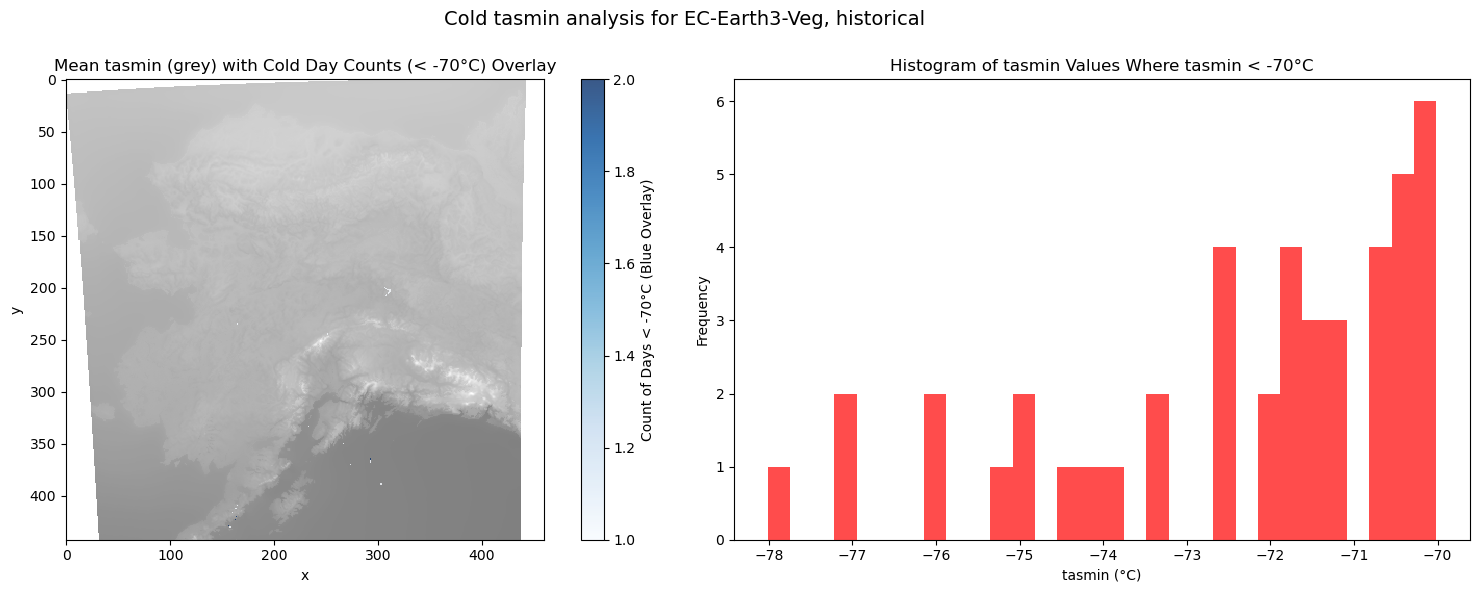

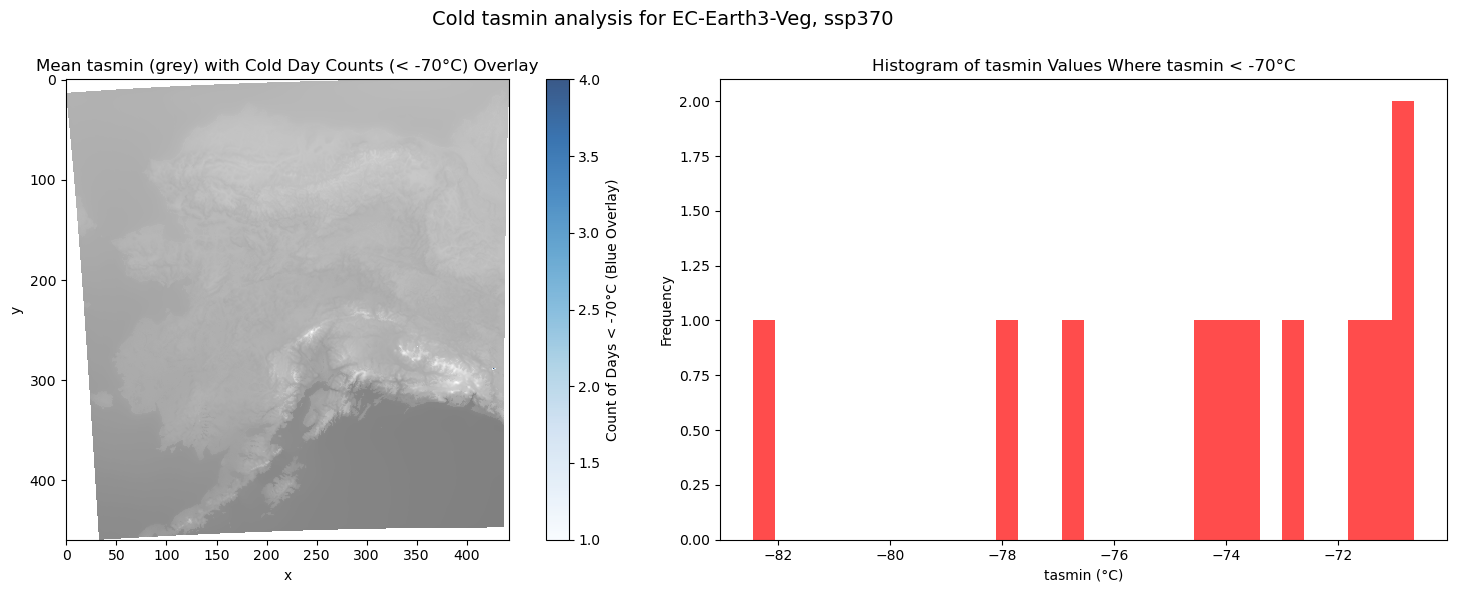

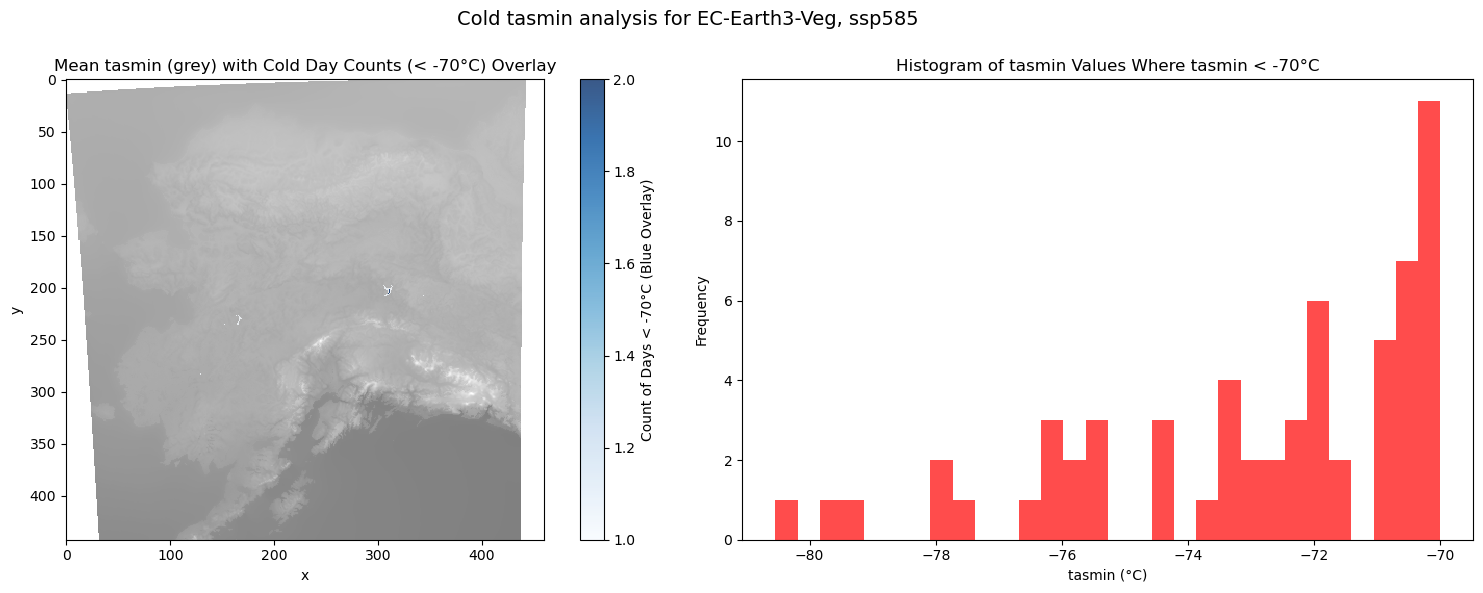

In [24]:
model = "EC-Earth3-Veg"
scenario = "historical"
for scenario in ["historical", "ssp370", "ssp585"]:
    plot_cold_tasmin(model, scenario)

### E3SM-2-0

### HadGEM3-GC31-LL

### KACE-1-0-G

### NorESM2-MM